In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("D:/Courses/###Eng. Mazen - Data Analysis/9- Python/سيشن 29/Adidas US Sales Datasets.xlsx", skiprows=4)

In [6]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [7]:
df = df.drop("Unnamed: 0", axis=1)


KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
df.head()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [8]:
df.drop("Retailer ID", axis=1, inplace=True)

In [9]:
df.isnull()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,False,False,False,False,False,False,False,False,False,False,False,False
9644,False,False,False,False,False,False,False,False,False,False,False,False
9645,False,False,False,False,False,False,False,False,False,False,False,False
9646,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df[df.isnull().any(axis=1)]

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


In [25]:
df[['Price per Unit', 'Total Sales', 'Operating Profit']].describe().astype(int)

,Price per Unit,Total Sales,Operating Profit
count,9648,9648,9648
mean,45,93273,34425
std,14,141916,54193
min,7,0,0
25%,35,4254,1921
50%,45,9576,4371
75%,55,150000,52062
max,110,825000,390000


In [12]:
df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

Product
Men's Street Footwear        593320
Men's Athletic Footwear      435526
Women's Apparel              433827
Women's Street Footwear      392269
Women's Athletic Footwear    317236
Men's Apparel                306683
Name: Units Sold, dtype: int64

In [13]:
df.groupby('Product')['Units Sold'].sum().sort_values(ascending=True)

Product
Men's Apparel                306683
Women's Athletic Footwear    317236
Women's Street Footwear      392269
Women's Apparel              433827
Men's Athletic Footwear      435526
Men's Street Footwear        593320
Name: Units Sold, dtype: int64

In [14]:
df.groupby('City')['Operating Margin'].sum().sort_values(ascending=False).head(5)

City
Portland     146.78
Charleston   128.14
Birmingham   119.57
Knoxville    109.42
Dallas        99.88
Name: Operating Margin, dtype: float64

In [15]:
df.groupby('City')['Operating Margin'].sum().sort_values(ascending=True).head(5)

City
Honolulu      46.02
Seattle       46.81
Anchorage     50.38
Sioux Falls   56.83
Fargo         57.40
Name: Operating Margin, dtype: float64

In [20]:
top_cities = df.groupby('City')['Operating Margin'].sum().sort_values(ascending=False).head(5)


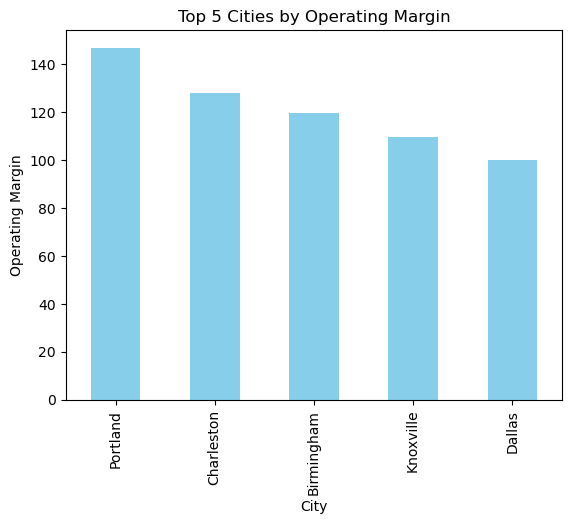

In [23]:
import matplotlib.pyplot as plt

top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 5 Cities by Operating Margin')
plt.xlabel('City')
plt.ylabel('Operating Margin')
plt.show()
